In [47]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import read_vars_WRF_RAMS
import xarray as xr
import seaborn as sns
import itertools

# Set parameters and variables

In [48]:
matplotlib.rcParams["font.family"] = "Roboto"
matplotlib.rcParams["font.sans-serif"] = ["Roboto"]  # For non-unicode text
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['legend.fontsize'] = 16
matplotlib.rcParams['legend.facecolor'] = 'w'

# which domain
domain='1'    

# colors for each simulation
colors      = ['#000000','#377eb8', '#56B4E9','#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

#simulation names
simulations = ['PHI2.1-R','PHI1.1-R','AUS1.1-R','USA1.1-R','WPO1.1-R','BRA1.1-R','BRA1.2-R','RSA1.1-R','ARG1.1-R','ARG1.2-R','DRC1.1-R']

# dictionary containing files for each simulation
file_dict_g1 = {'PHI2.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/PHI2.1-R-V0/G3/out_30s/a-A-2019-09-10-153000-g'+'1'+'.h5',
             'PHI1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/PHI1.1-R-V0/G3/out_30s/a-A-2019-09-10-120000-g'+'1'+'.h5',
             'AUS1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/AUS1.1-R-V0/G3/out_30s/a-A-2006-01-23-120000-g'+'1'+'.h5',
             'USA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/USA1.1-R-V0/G3/out_30s/a-A-2022-09-16-110000-g'+'1'+'.h5',
             'WPO1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/WPO1.1-R-V0/G3/out_30s/a-A-2018-08-28-065000-g'+'1'+'.h5',
             'BRA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.1-R-V0/G3/out_30s/a-A-2014-03-31-190000-g'+'1'+'.h5',
             'BRA1.2-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.2-R-V0/G3/out_30s/a-A-2014-04-01-140000-g'+'1'+'.h5',
             'RSA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/RSA1.1-R-V0/G3/out_30s/a-A-2008-03-11-123000-g'+'1'+'.h5',
             'ARG1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.1-R-V0/G3_old/out_30s/a-A-2018-12-13-210000-g'+'1'+'.h5',
             'ARG1.2-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.2-R-V0/G3/out_30s/a-A-2018-12-14-013000-g'+'1'+'.h5',
             'DRC1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/DRC1.1-R-V0/G3/out_30s/a-A-2016-12-30-113000-g'+'1'+'.h5'}

file_dict_g2 = {'PHI2.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/PHI2.1-R-V0/G3/out_30s/a-A-2019-09-10-153000-g'+'2'+'.h5',
             'PHI1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/PHI1.1-R-V0/G3/out_30s/a-A-2019-09-10-120000-g'+'2'+'.h5',
             'AUS1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/AUS1.1-R-V0/G3/out_30s/a-A-2006-01-23-120000-g'+'2'+'.h5',
             'USA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/USA1.1-R-V0/G3/out_30s/a-A-2022-09-16-110000-g'+'2'+'.h5',
             'WPO1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/WPO1.1-R-V0/G3/out_30s/a-A-2018-08-28-065000-g'+'2'+'.h5',
             'BRA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.1-R-V0/G3/out_30s/a-A-2014-03-31-190000-g'+'2'+'.h5',
             'BRA1.2-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.2-R-V0/G3/out_30s/a-A-2014-04-01-140000-g'+'2'+'.h5',
             'RSA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/RSA1.1-R-V0/G3/out_30s/a-A-2008-03-11-123000-g'+'2'+'.h5',
             'ARG1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.1-R-V0/G3_old/out_30s/a-A-2018-12-13-210000-g'+'2'+'.h5',
             'ARG1.2-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.2-R-V0/G3/out_30s/a-A-2018-12-14-013000-g'+'2'+'.h5',
             'DRC1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/DRC1.1-R-V0/G3/out_30s/a-A-2016-12-30-113000-g'+'2'+'.h5'}


file_dict_g3 = {'PHI2.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/PHI2.1-R-V0/G3/out_30s/a-A-2019-09-10-153000-g'+'3'+'.h5',
             'PHI1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/PHI1.1-R-V0/G3/out_30s/a-A-2019-09-10-120000-g'+'3'+'.h5',
             'AUS1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/AUS1.1-R-V0/G3/out_30s/a-A-2006-01-23-120000-g'+'3'+'.h5',
             'USA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/USA1.1-R-V0/G3/out_30s/a-A-2022-09-16-110000-g'+'3'+'.h5',
             'WPO1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/WPO1.1-R-V0/G3/out_30s/a-A-2018-08-28-065000-g'+'3'+'.h5',
             'BRA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.1-R-V0/G3/out_30s/a-A-2014-03-31-190000-g'+'3'+'.h5',
             'BRA1.2-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.2-R-V0/G3/out_30s/a-A-2014-04-01-140000-g'+'3'+'.h5',
             'RSA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/RSA1.1-R-V0/G3/out_30s/a-A-2008-03-11-123000-g'+'3'+'.h5',
             'ARG1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.1-R-V0/G3_old/out_30s/a-A-2018-12-13-210000-g'+'3'+'.h5',
             'ARG1.2-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.2-R-V0/G3/out_30s/a-A-2018-12-14-013000-g'+'3'+'.h5',
             'DRC1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/DRC1.1-R-V0/G3/out_30s/a-A-2016-12-30-113000-g'+'3'+'.h5'}

# All functions

In [32]:
def get_percentile_w_from_file(FILENAME, PERCENTILES=[50,95,99], METHOD=None):
    w, w_name, w_units, w_time = read_vars_WRF_RAMS.read_variable(FILENAME,'W','RAMS',output_height=False,interpolate=None,level=None,interptype=None)
    qtc, qtc_name, qtc_units, qtc_time = read_vars_WRF_RAMS.read_variable(FILENAME,'QTC','RAMS',output_height=False,interpolate=None,level=None,interptype=None)
   
    w_flat = w.flatten()
    qtc_flat = qtc.flatten()

    condition = (w_flat > 1.0) & (qtc_flat > 0.00001) # get w at all the points where w>1 m/s and total condensate>0.00001 kg/kg

    # Get the points from w that satisfy the condition
    w_filtered = w_flat[condition]

    return np.percentile(w_filtered,PERCENTILES)


def get_percentile_w_from_array(W_ARRAY,QTC_ARRAY, PERCENTILES=[50,75,95,99], METHOD=None):
    
    w_flat = W_ARRAY.flatten()
    w_flat = w_flat[~np.isnan(w_flat)]
    qtc_flat = QTC_ARRAY.flatten()
    qtc_flat = qtc_flat[~np.isnan(qtc_flat)]

    condition = (w_flat > 1.0) & (qtc_flat > 0.00001) # get w at all the points where w>1 m/s and total condensate>0.00001 kg/kg

    # Get the points from w that satisfy the condition
    w_filtered = w_flat[condition]

    return np.percentile(w_filtered,PERCENTILES)

def get_hmax_each_column(W_3DARRAY, Q_3DARRAY, H_3DARRAY):
    """
    W, Q, and H are 3D arrays of vertical velocity, some quantity (e.g., humidity), and grid point height (z, y, x).
    Only those values in W are retained where W > 2 and Q > 0.00001.
    Return a 1D flattened array of maximum W values in each column and the height corresponding to Wmax,
    while ignoring columns where all values in W are -999.
    """
    # Apply the conditions W > 2 and Q > 0.00001
    mask = (W_3DARRAY > 2) & (Q_3DARRAY > 0.00001)
    
    # Set elements of W_3DARRAY that do not meet the conditions to -999
    W_3DARRAY = np.where(mask, W_3DARRAY, -999)
    
    # Initialize lists to store valid wmax and hmax
    wmax_list = []
    hmax_list = []
    
    # Loop through each column (y, x) and process only valid ones
    for y in range(W_3DARRAY.shape[1]):
        for x in range(W_3DARRAY.shape[2]):
            # Check if the entire column is -999
            if np.all(W_3DARRAY[:, y, x] == -999):
                continue  # Skip this column
            
            # Find the index of the maximum w value along the vertical axis (z) for this column
            max_w_index = np.nanargmax(W_3DARRAY[:, y, x])
            
            # Get the corresponding maximum w and h values
            wmax = W_3DARRAY[max_w_index, y, x]
            hmax = H_3DARRAY[max_w_index, y, x]
            
            # Append valid wmax and hmax to the lists
            wmax_list.append(wmax)
            hmax_list.append(hmax)
    
    # Convert lists to flattened arrays
    wmax_flat = np.array(wmax_list)
    hmax_flat = np.array(hmax_list)

    return wmax_flat, hmax_flat

def grab_intersection_gbig_gsmall_RAMS(VARIABLE,RAMS_G1_or_G2_FILE,RAMS_G3_FILE):
    """
    Arguments:
    1. VARIABLE          : the variable you want; this is a list. example   ['W'  , -999   , 'model'   , '$w$'       , '$m^{1}s^{-1}$'] 
    -999 in the above list will grab the 3D variable; any + value (such as 500 or 2) will grab the 2d variable at that model or pressure level
    2. RAMS_G1_or_G2_FILE: file for the bigger grid that needs to be subsetted - G1 or G2
    3. RAMS_G3_FILE      : file for the smaller grid that is used to subset G1 or G2
    
    Output:
    tuple containing the following: 
    1. numpy array containing the values of subsetted G1 or G2
    2. name of the variable
    3. units of the variable 
    4. timestamp
    """
    print('file with larger grid: ',RAMS_G1_or_G2_FILE)
    print('file with smaller grid: ',RAMS_G3_FILE)
    
    print('reading ',VARIABLE[0],' from the larger grid...')
    z, z_name, z_units, z_time = read_vars_WRF_RAMS.read_variable(RAMS_G1_or_G2_FILE,VARIABLE[0],'RAMS',output_height=False,interpolate=VARIABLE[1]>-1,level=VARIABLE[1],interptype=VARIABLE[2])
    
    print('        done getting the variable ',VARIABLE[0],' with shape: ',np.shape(z),'\n')
    print('        subsetting the larger domain...\n')
    # grab lat-lon of the big and small domains
    ds_big   = xr.open_dataset(RAMS_G1_or_G2_FILE,engine='h5netcdf',phony_dims='sort')[['GLAT','GLON']]
    ds_small = xr.open_dataset(RAMS_G3_FILE,engine='h5netcdf',phony_dims='sort')[['GLAT','GLON']]
    ds_template = xr.open_dataset(RAMS_G1_or_G2_FILE,engine='h5netcdf',phony_dims='sort')[['WP']]
        
    if z.ndim==2:
        dim1, dim2 = ds_template.WP.dims
    if z.ndim==3:
        dim0, dim1, dim2 = ds_template.WP.dims
    
    min_lat_big = ds_big.GLAT.min().values
    max_lat_big = ds_big.GLAT.max().values
    min_lon_big = ds_big.GLON.min().values
    max_lon_big = ds_big.GLON.max().values
    print('        min and max lat for the coarser domain = ',min_lat_big,' ',max_lat_big)
    print('        min and max lon for the coarser domain = ',min_lon_big,' ',max_lon_big)
    print('        ----')
    
    min_lat_small = ds_small.GLAT.min().values
    max_lat_small = ds_small.GLAT.max().values
    min_lon_small = ds_small.GLON.min().values
    max_lon_small = ds_small.GLON.max().values
    print('        min and max lat for the finer domain = ',min_lat_small,' ',max_lat_small)
    print('        min and max lon for the finer domain = ',min_lon_small,' ',max_lon_small)
    print('        ----')
    
    #subset by lat/lon - used so only region covered by inner grid is compared
    if z.ndim==2:
        ds = xr.Dataset({VARIABLE[0]: xr.DataArray(data   = z,  dims   = [dim1, dim2])})
    if z.ndim==3:
        ds = xr.Dataset({VARIABLE[0]: xr.DataArray(data   = z,  dims   = [dim0, dim1, dim2])})
    
    ds = ds.assign(GLAT=ds_big.GLAT)
    ds = ds.assign(GLON=ds_big.GLON)
    
    ds = ds.where((ds.GLAT>=min_lat_small) & (ds.GLAT<=max_lat_small) & (ds.GLON>=min_lon_small) & (ds.GLON<=max_lon_small), drop=True)
    min_lat = ds.GLAT.min().values
    max_lat = ds.GLAT.max().values
    min_lon = ds.GLON.min().values
    max_lon = ds.GLON.max().values
    
    print('        min and max lat for modified coarser domain = ',min_lat,' ',max_lat)
    print('        min and max lon for modified coarser domain = ',min_lon,' ',max_lon)
    print('        ----')
    
    #print(ds)
    print('        horizontal shape of finer domain: ',np.shape(ds_small['GLAT']))
    print('        shape of coarser domain: ',np.shape(ds_template['WP']))
    print('        shape of modified coarser domain: ',np.shape(ds[VARIABLE[0]]))
    #return z, z_name, z_units, z_time
    return ds.variables[VARIABLE[0]].values

# plot PDFs of hmax

PHI2.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/PHI2.1-R-V0/G3/out_30s/a-A-2019-09-10-153000-g1.h5
plotting...
------

PHI1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/PHI1.1-R-V0/G3/out_30s/a-A-2019-09-10-120000-g1.h5
plotting...
------

AUS1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/AUS1.1-R-V0/G3/out_30s/a-A-2006-01-23-120000-g1.h5
plotting...
------

USA1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/USA1.1-R-V0/G3/out_30s/a-A-2022-09-16-110000-g1.h5
plotting...
------

WPO1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/WPO1.1-R-V0/G3/out_30s/a-A-2018-08-28-065000-g1.h5
plotting...
------

BRA1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.1-R-V0/G3/out_30s/a-A-2014-03-31-190000-g1.h5
plotting...
------

BRA1.2-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.2-R-V0/G3/out_30s/a-A-2014-04-01-140000-g1.h5
plotting...
------

RSA1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/RSA1.1-R-V0/G3/out_30s/a-A-2008-03-11-123000-g1.h5
plotting...
------

ARG1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.1-R-V0/G3_old/out_30s/

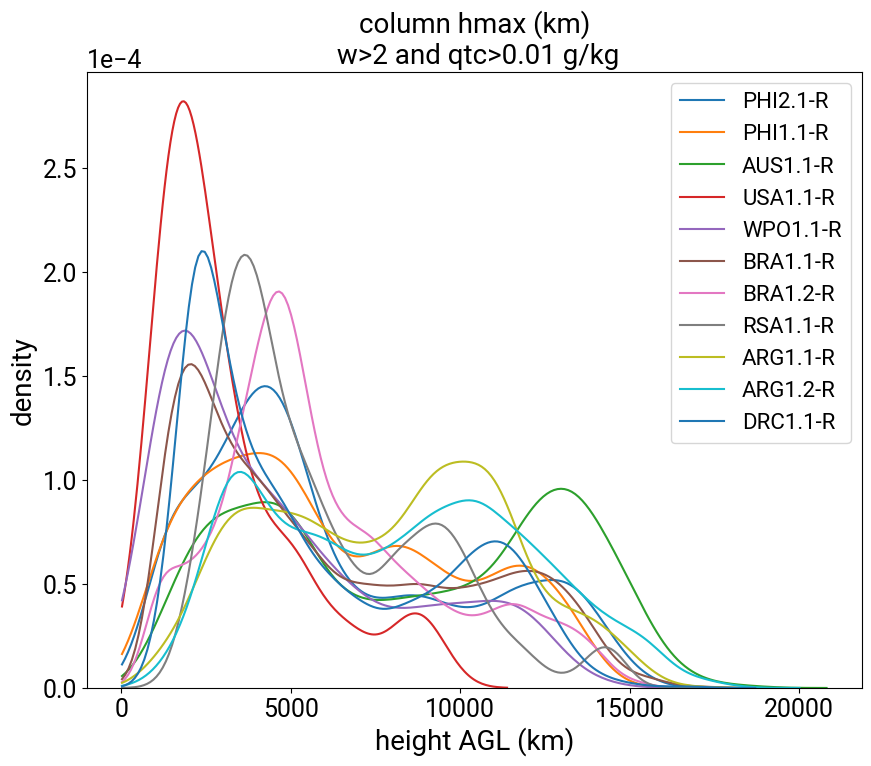

In [55]:
fig = plt.figure(figsize=(10,8))

for simulation_name,filename in file_dict_g1.items(): 
#for simulation_name,filename in itertools.islice(file_dict_g1.items(), 2): # get first n elements of dictionary for testing
    print(simulation_name,': ',filename)
    w, h, w_name, w_units, w_time      = read_vars_WRF_RAMS.read_variable(filename,'W','RAMS',output_height=True,interpolate=None,level=None,interptype=None)
    qtc, qtc_name, qtc_units, qtc_time = read_vars_WRF_RAMS.read_variable(filename,'QTC','RAMS',output_height=False,interpolate=None,level=None,interptype=None)
    wmax_1d, hmax_1d                   = get_hmax_each_column(w, qtc, h)
    print('plotting...')
    sns.kdeplot(hmax_1d,clip=[25,30000], label=simulation_name)
    print('------\n')
    
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('height AGL (km)')
plt.ylabel('density')
plt.legend()
plt.title('column hmax (km)\n w>2 and qtc>0.01 g/kg')
plt.savefig('G1_hmax_pdf.png',dpi=200)

PHI2.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/PHI2.1-R-V0/G3/out_30s/a-A-2019-09-10-153000-g1.h5
plotting...
------

PHI1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/PHI1.1-R-V0/G3/out_30s/a-A-2019-09-10-120000-g1.h5
plotting...
------

AUS1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/AUS1.1-R-V0/G3/out_30s/a-A-2006-01-23-120000-g1.h5
plotting...
------

USA1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/USA1.1-R-V0/G3/out_30s/a-A-2022-09-16-110000-g1.h5
plotting...
------

WPO1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/WPO1.1-R-V0/G3/out_30s/a-A-2018-08-28-065000-g1.h5
plotting...
------

BRA1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.1-R-V0/G3/out_30s/a-A-2014-03-31-190000-g1.h5
plotting...
------

BRA1.2-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.2-R-V0/G3/out_30s/a-A-2014-04-01-140000-g1.h5
plotting...
------

RSA1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/RSA1.1-R-V0/G3/out_30s/a-A-2008-03-11-123000-g1.h5
plotting...
------

ARG1.1-R :  /monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.1-R-V0/G3_old/out_30s/

Text(0.5, 1.0, 'column wmax (m/s)\n w>2 and qtc>0.01 g/kg')

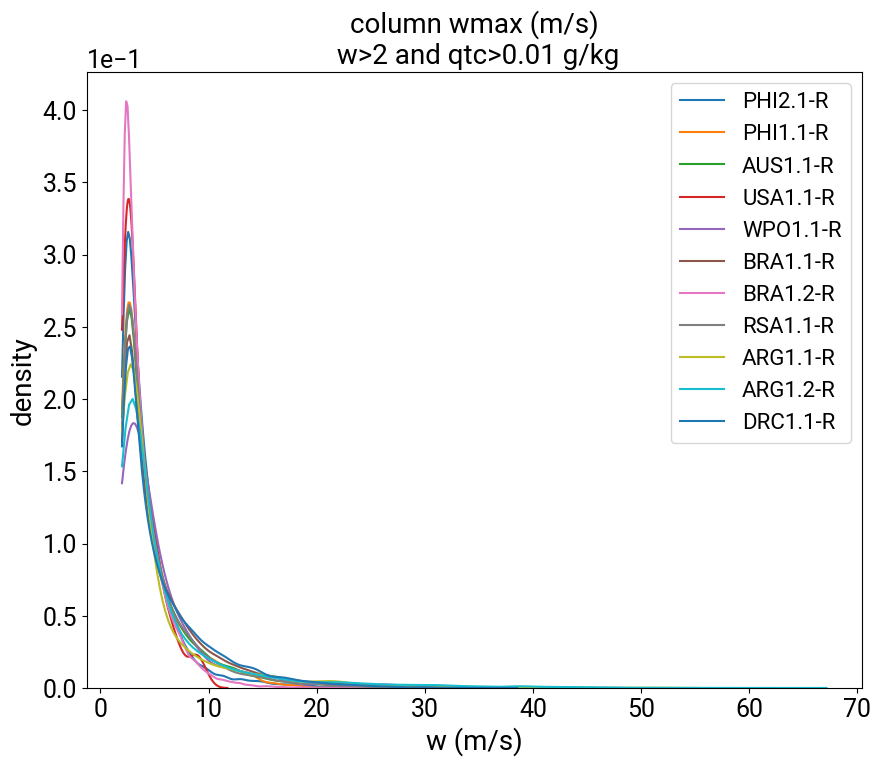

In [54]:
fig = plt.figure(figsize=(10,8))
ax = plt.gca()

for simulation_name,filename in file_dict_g1.items(): 
#for simulation_name,filename in itertools.islice(file_dict_g1.items(), 2): # get first n elements of dictionary for testing
    print(simulation_name,': ',filename)
    w, h, w_name, w_units, w_time      = read_vars_WRF_RAMS.read_variable(filename,'W','RAMS',output_height=True,interpolate=None,level=None,interptype=None)
    qtc, qtc_name, qtc_units, qtc_time = read_vars_WRF_RAMS.read_variable(filename,'QTC','RAMS',output_height=False,interpolate=None,level=None,interptype=None)
    wmax_1d, hmax_1d                   = get_hmax_each_column(w, qtc, h)
    print('plotting...')
    sns.kdeplot(wmax_1d,clip=[2,300],label=simulation_name)
    print('------\n')
    
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('w (m/s)')
plt.ylabel('density')
plt.legend()
plt.title('column wmax (m/s)\n w>2 and qtc>0.01 g/kg')
plt.savefig('G1_wmax_pdf.png',dpi=200)

In [ ]:
#get_percentile_w(file_dict['PHI2.1-R'], METHOD=None)

In [14]:
#aaa = grab_intersection_gbig_gsmall_RAMS(['W',-999,'model','$w$','$m^{1}s^{-1}$'],file_dict_g1['PHI2.1-R'],file_dict_g3['PHI2.1-R'])

file with larger grid:  /monsoon/MODEL/LES_MODEL_DATA/V0/PHI2.1-R-V0/G3/out_30s/a-A-2019-09-10-153000-g1.h5
file with smaller grid:  /monsoon/MODEL/LES_MODEL_DATA/V0/PHI2.1-R-V0/G3/out_30s/a-A-2019-09-10-153000-g3.h5
reading  W  from the larger grid...
        done getting the variable  W  with shape:  (232, 500, 670) 

        subsetting the larger domain...

        min and max lat for the coarser domain =  12.856292724609375   20.091171264648438
        min and max lon for the coarser domain =  124.48120880126953   134.7188262939453
        ----
        min and max lat for the finer domain =  15.166404724121094   17.623472213745117
        min and max lon for the finer domain =  127.26988220214844   129.81573486328125
        ----
        min and max lat for modified coarser domain =  15.16641616821289   17.62342071533203
        min and max lon for modified coarser domain =  127.26990509033203   129.80393981933594
        ----
        horizontal shape of finer domain:  (2718, 2698)